# mnist data classification using CNN and SVM

*Abolfazl A.Ansari 

## import needed library for part I

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [31]:
num_classes = 10

#shape of images
#28* 28 pixel
input_shape = (28,28,1)


In [112]:
#import mnist data from csv

train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
x_train = train.drop("label", axis = 1)
y_train = train[["label"]]
x_test = test.drop("label", axis = 1)
y_test = test[["label"]]


In [113]:
x_train = x_train.values.reshape(60000,28, 28)
x_test = x_test.values.reshape(10000,28, 28)

In [65]:
#normalize between [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255



#each image must have shape 28 * 28
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)




print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [66]:
print(y_train)
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[1:5])

       label
0          5
1          0
2          4
3          1
4          9
...      ...
59995      8
59996      3
59997      5
59998      6
59999      8

[60000 rows x 1 columns]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Model

In [67]:
model = keras.Sequential (
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Training the Model

In [69]:
# set some hyper parameter
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics = ["accuracy", 
                        keras.metrics.Precision(),
                       keras.metrics.Recall()])

history = model.fit(x_train, y_train, batch_size = batch_size,
                   epochs = epochs, validation_split = 0.1)

Epoch 1/15
422/422 [==============================] - 29s 54ms/step - loss: 0.3737 - accuracy: 0.8861 - precision: 0.9431 - recall: 0.8358 - val_loss: 0.0898 - val_accuracy: 0.9745 - val_precision: 0.9810 - val_recall: 0.9703
Epoch 2/15
422/422 [==============================] - 19s 46ms/step - loss: 0.1208 - accuracy: 0.9629 - precision: 0.9693 - recall: 0.9571 - val_loss: 0.0626 - val_accuracy: 0.9823 - val_precision: 0.9854 - val_recall: 0.9790
Epoch 3/15
422/422 [==============================] - 18s 43ms/step - loss: 0.0907 - accuracy: 0.9720 - precision: 0.9763 - recall: 0.9685 - val_loss: 0.0533 - val_accuracy: 0.9852 - val_precision: 0.9878 - val_recall: 0.9833
Epoch 4/15
422/422 [==============================] - 18s 43ms/step - loss: 0.0771 - accuracy: 0.9761 - precision: 0.9792 - recall: 0.9733 - val_loss: 0.0461 - val_accuracy: 0.9868 - val_precision: 0.9888 - val_recall: 0.9857
Epoch 5/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0665 - accuracy: 0

## Visualizing the model metrics

In [70]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


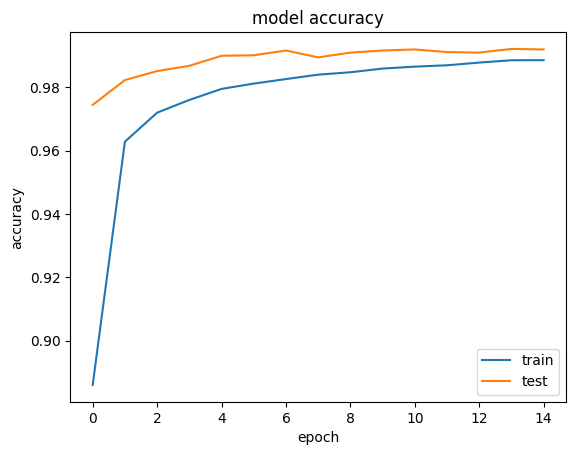

In [76]:
print(history.history.keys())

# summurize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


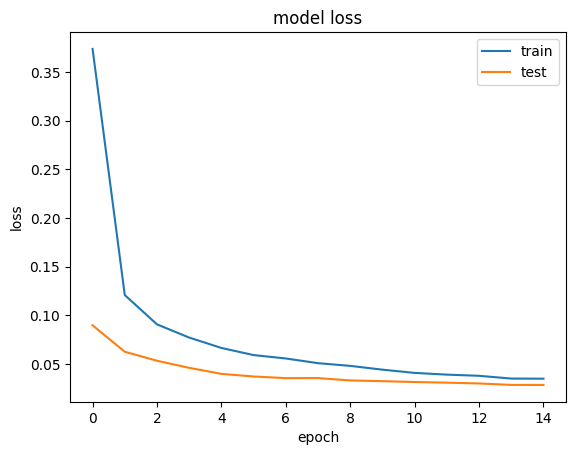

In [77]:
# summurize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

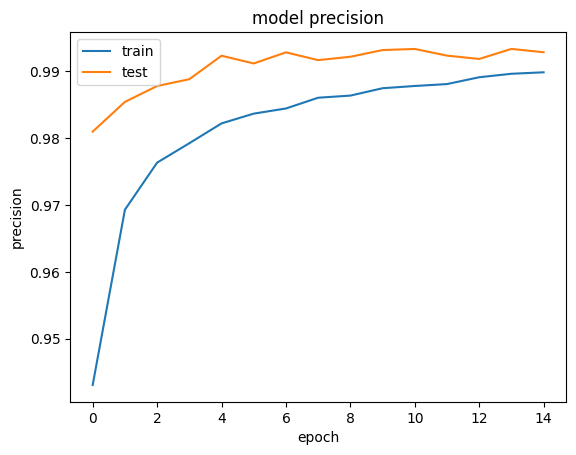

In [78]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

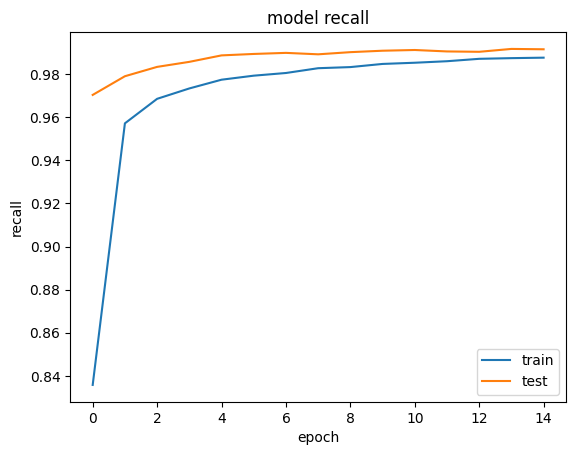

In [81]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


## Test Accuracy on the model

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


Test loss: 0.02599087916314602
Test accuracy 0.9902999997138977


## Support Vectore Machine

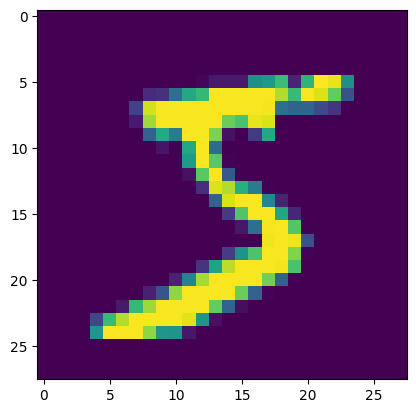

In [116]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

## Flatting the data

In [90]:
def flat(data):
    
    data_ = []
    
    for i in range(len(data)):
        data_.append(data[i].flatten())
        
    return data_

In [95]:
x_test_ = flat(x_test)
x_train_ = flat(x_train)

## Creating the classes from categorical data

In [96]:
def test_max(data):
    
    test_c = []
    
    for i in range(len(data)):
        test_c.append(np.argmax(data[i]))
    
    return test_c

In [97]:
y_test_ = test_max(y_test)
y_train_ = test_max(y_train)

## Splitting the data

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train_, y_train_, 
                                                  test_size = 0.2, random_state = 13)


## Support Vector Classifier (SVC)

In [100]:
from sklearn.svm import SVC

svc = SVC().fit(x_train_, y_train_)

In [102]:
y_pred_ = svc.predict(x_test_)

In [104]:
y_train_pred = svc.predict(x_train_)

## Caculating the metrics

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [107]:
print(f"Test Accuracy score of the data {accuracy_score(y_pred_, y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(y_train_pred, y_train_)}")

Test Accuracy score of the data 0.9792
Train Accuracy score of the data 0.9899166666666667


## Classification Report

In [109]:
print("****************** TRAIN CLASSIFICATION REPORT ******************")
print(" ")
print(classification_report(y_train_pred, y_train_))

print(" ")

print("****************** TEST CLASSIFICATION REPORT ******************")
print(" ")
print(classification_report(y_pred_, y_test_))

****************** TRAIN CLASSIFICATION REPORT ******************
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5937
           1       0.99      0.99      0.99      6767
           2       0.99      0.99      0.99      5982
           3       0.98      0.99      0.99      6080
           4       0.99      0.99      0.99      5868
           5       0.99      0.99      0.99      5407
           6       1.00      0.99      1.00      5926
           7       0.99      0.99      0.99      6260
           8       0.99      0.99      0.99      5841
           9       0.98      0.98      0.98      5932

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

 
****************** TEST CLASSIFICATION REPORT ******************
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      